# 00 Imports

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 01 Data assessment and preprocessing

In [282]:
prices = pd.read_csv('/content/amazon_laptop_prices_v01.csv')

In [283]:
prices.sample(5)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
454,ROKC,Ideapad 3,15.6 Inches,Gray,1000 GB,Intel Core i5,20 GB,Windows 11,NaN,Integrated,Intel,NaN,NaN,$639.99
3274,Dell,Precision 5770 Laptop,17 Inches,Silver,2000 GB,Core i7,64 GB,Windows 11 Pro,Wifi & Bluetooth,Nvidia RTX A2000,NaN,NaN,NaN,"$2,691.43"
4136,Dell,XPS 9510 Laptop,15.6 Inches,Platinum Silver,4000 GB,Core i7,16 GB,Windows 10 Home,Wifi & Bluetooth,Nvidia GeForce RTX 3050 Ti,NaN,NaN,NaN,"$3,496.99"
1285,HP,EliteBook 1040 G9,14 Inches,NaN,512 GB,Core i7,16 GB,Windows 11 Pro,Anti-glare Screen,Iris Xe Graphics,Intel Iris Xe Graphics,NaN,NaN,"$1,963.30"
3016,HP,NaN,14 Inches,Rose Gold,64 GB,Celeron N4000,16 GB,Windows 11,NaN,Integrated,Intel,1.1 GHz,4.7,$389.99


In [284]:
prices.shape

(4446, 14)

In [285]:
prices.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'rating', 'price'],
      dtype='object')

In [286]:
prices.isna().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [287]:
# Brand

prices['brand'].unique()

array(['ROKC', 'HP', 'MSI', 'Apple', 'Acer', 'ASUS', 'acer', 'Gateway',
       'Lenovo', 'DELL', 'Dell', 'LG', 'Microsoft', 'SAMSUNG',
       'Carlisle FoodService Products', 'Gigabyte', 'Razer', 'Asus',
       'LENOVO', 'Panasonic', 'Toughbook', 'Corsair', 'Alienware', 'AWOW',
       'Quality Refurbished Computers', 'dell', 'IVIEW', 'hp', 'XPG',
       'Computer Upgrade King', 'CTL', 'Best Notebooks', 'LPT',
       'Goldengulf', 'lenovo', 'ONN', 'Latitude', 'VAIO', 'Luqeeg',
       'MICROTELLA', 'Elo', 'SHOXLAB', 'GizPro', 'MAINGEAR', 'Tocosy',
       'asus', 'XAMMUE', 'JTD', 'Mytrix', 'TOPOSH'], dtype=object)

In [288]:
# Unifying brand names

prices['brand'] = prices['brand'].replace({'hp': 'HP', 'acer': 'Acer',
                                'ASUS': 'Asus', 'asus': 'Asus',
                                'dell': 'Dell', 'DELL': 'Dell',
                                'lenovo': 'Lenovo', 'LENOVO': 'Lenovo',
                                'SAMSUNG': 'Samsung'})
prices['brand'].unique()

array(['ROKC', 'HP', 'MSI', 'Apple', 'Acer', 'Asus', 'Gateway', 'Lenovo',
       'Dell', 'LG', 'Microsoft', 'Samsung',
       'Carlisle FoodService Products', 'Gigabyte', 'Razer', 'Panasonic',
       'Toughbook', 'Corsair', 'Alienware', 'AWOW',
       'Quality Refurbished Computers', 'IVIEW', 'XPG',
       'Computer Upgrade King', 'CTL', 'Best Notebooks', 'LPT',
       'Goldengulf', 'ONN', 'Latitude', 'VAIO', 'Luqeeg', 'MICROTELLA',
       'Elo', 'SHOXLAB', 'GizPro', 'MAINGEAR', 'Tocosy', 'XAMMUE', 'JTD',
       'Mytrix', 'TOPOSH'], dtype=object)

In [289]:
# Reducing brand diversity

brand_counts = prices['brand'].value_counts()

brand_mask = brand_counts < 20

In [290]:
prices.loc[prices['brand'].isin(brand_counts[brand_mask].index), 'brand'] = 'Other'

In [291]:
prices['brand'].value_counts()

Dell       1730
HP          810
ROKC        637
MSI         473
Lenovo      318
Asus        163
Acer        119
Other       105
LG           39
Apple        29
Samsung      23
Name: brand, dtype: int64

In [292]:
prices.isna().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [293]:
# Dropping cols with significant amount of Nans

prices = prices.drop(columns=['model', 'color', 'harddisk', 'special_features',
                              'graphics_coprocessor', 'cpu_speed', 'rating'])

In [294]:
prices.isna().sum()

brand            0
screen_size     29
cpu            100
ram             61
OS              26
graphics        65
price            5
dtype: int64

In [295]:
# Screen size

prices['screen_size'].unique()

array(['14 Inches', '15.6 Inches', '15.66 Inches', '13.3 Inches',
       '15.3 Inches', '16 Inches', '17.3 Inches', '11.6 Inches',
       '15 Inches', '13.4 Inches', '18 Inches', '17 Inches',
       '16.2 Inches', '13.6 Inches', '14.4 Inches', '13 Inches',
       '14.5 Inches', '12.45 Inches', '12.2 Inches', '13.5 Inches',
       '13.1 Inches', '12 Inches', nan, '10.5 Inches', '12.3 Inches',
       '10.1 Inches', '13.9 Inches', '14.1 Inches', '11 Inches',
       '12.4 Inches', '15.4 Inches', '12.5 Inches', '16.1 Inches',
       '22 Inches', '27 Inches', '10 Inches'], dtype=object)

In [296]:
def screen_size_parser(screen_size):
  return float(screen_size.split()[0])

In [297]:
prices['screen_size'] = prices['screen_size'].fillna(prices['screen_size'].mode()[0])

In [298]:
prices['screen_size'].unique()

array(['14 Inches', '15.6 Inches', '15.66 Inches', '13.3 Inches',
       '15.3 Inches', '16 Inches', '17.3 Inches', '11.6 Inches',
       '15 Inches', '13.4 Inches', '18 Inches', '17 Inches',
       '16.2 Inches', '13.6 Inches', '14.4 Inches', '13 Inches',
       '14.5 Inches', '12.45 Inches', '12.2 Inches', '13.5 Inches',
       '13.1 Inches', '12 Inches', '10.5 Inches', '12.3 Inches',
       '10.1 Inches', '13.9 Inches', '14.1 Inches', '11 Inches',
       '12.4 Inches', '15.4 Inches', '12.5 Inches', '16.1 Inches',
       '22 Inches', '27 Inches', '10 Inches'], dtype=object)

In [299]:
prices['screen_size'] = prices['screen_size'].apply(screen_size_parser)

In [300]:
prices['screen_size'].unique()

array([14.  , 15.6 , 15.66, 13.3 , 15.3 , 16.  , 17.3 , 11.6 , 15.  ,
       13.4 , 18.  , 17.  , 16.2 , 13.6 , 14.4 , 13.  , 14.5 , 12.45,
       12.2 , 13.5 , 13.1 , 12.  , 10.5 , 12.3 , 10.1 , 13.9 , 14.1 ,
       11.  , 12.4 , 15.4 , 12.5 , 16.1 , 22.  , 27.  , 10.  ])

In [301]:
prices['screen_size'].dtype

dtype('float64')

In [302]:
# CPU

prices['cpu'].unique()

array(['Intel Core i7', 'Intel Core i5', 'Intel Core i9', 'Unknown',
       'Ryzen 3', 'Celeron N4020', 'Core i7', 'Core I3 1115G4', 'Core i5',
       'Ryzen 3 3250U', 'Pentium', 'Pentium N5000', 'AMD Ryzen 7',
       'Intel Core i3', 'Core i3', 'Ryzen 5', 'Celeron', 'Core i3 Family',
       'Core i9', 'Celeron N', 'Celeron P4500', 'AMD Ryzen 5 5500U',
       'Core i3-1115G4E', 'MediaTek MT8183', 'Ryzen 7', 'Ryzen 9',
       'Core i7-8650U', 'Intel Core i7-1355U', 'ARM 7100', 'Apple M1',
       'Celeron N4000', 'Core i7-13700K', nan, 'MediaTek_MT8127',
       'Core i5 Family', 'Core i5 6200U', 'Celeron N3450',
       'Ryzen 3 3350U', 'Ryzen 9 7900X', 'Core i3-1005G1',
       'Core i7 Family', 'AMD A Series', 'Others', 'Celeron N3350',
       'Snapdragon', 'Intel Core i5-1135G7', 'Core i5-10210U', '8032',
       'AMD Ryzen 3 2300X', 'Ryzen 5 5500U', 'Intel Core i7 12800H',
       'Cortex', 'Core i5-1130G7', 'Ryzen 7 5800H', 'Athlon',
       'Pentium Other', 'Intel Core i7-1165G7', 'Core

In [303]:
prices['cpu'].isna().sum()

100

In [304]:
prices['cpu'] = prices['cpu'].fillna(prices['cpu'].mode()[0])

In [305]:
prices['cpu'] = prices['cpu'].apply(lambda x: x.lower())

In [306]:
cpu_dict = {('intel', 'pentium', 'i3', 'i5', 'i7', 'i9'): 'Intel',
            ('amd', 'ryzen'): 'AMD'}

def cpu_unifier(cpu):
  for k, v in cpu_dict.items():
    for elem in k:
      if elem in cpu:
        return v
  return 'Other'

prices['cpu'] = prices['cpu'].apply(cpu_unifier)

In [307]:
prices['cpu'].value_counts()

Intel    3884
Other     350
AMD       212
Name: cpu, dtype: int64

In [308]:
# RAM

prices['ram'].unique()

array(['8 GB', '64 GB', '32 GB', '4 GB', '16 GB', '20 GB', nan, '12 GB',
       '40 GB', '96 GB', '6 GB', '1 GB', '2 GB', '48 GB', '24 GB',
       '64 MB', '5 GB', '128 GB', '31.99 GB'], dtype=object)

In [309]:
prices[prices['ram'] == '64 MB']

,brand,screen_size,cpu,ram,OS,graphics,price
1473,Other,17.0,Intel,64 MB,Windows 11 Pro,Dedicated,"$4,999.00"


In [310]:
def ram_parser(ram):
  return int(ram.split()[0])

In [311]:
prices['ram'] = prices['ram'].replace({'31.99 GB': '32 GB', '64 MB': '64 GB'})
prices['ram'] = prices['ram'].fillna(prices['ram'].mode()[0])
prices['ram'] = prices['ram'].apply(ram_parser)

In [312]:
prices['ram'].unique()

array([  8,  64,  32,   4,  16,  20,  12,  40,  96,   6,   1,   2,  48,
        24,   5, 128])

In [338]:
prices['ram'].dtype

dtype('int64')

In [313]:
# OS

prices['OS'].unique()

array(['Windows 11', 'Windows 11 Pro', 'Windows 11 Home', 'Mac OS',
       'Windows 11 S', 'Chrome OS', 'Windows 10 S', 'Windows 10 Pro',
       'macOS 12 Monterey', nan, 'Windows 10 Home', 'Windows 10',
       'Windows 11 Home S', 'Windows', 'macOS 10.14 Mojave',
       'macOS 10.12 Sierra', 'Windows 7 Professional',
       'Windows 7 Pro + 10 Pro', 'PC', 'Mac OS X 10.0 Cheetah',
       'Windows 7',
       'Windows 10 Pro 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 S, Windows 10', 'Windows 11 Pro, Windows',
       'Windows 10 Professional 64-bit',
       'Windows 10 Pro 64 Bit-Multi-Language Support English/French/Spanish.',
       'Windows 7 Home Premium',
       'Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish',
       'Windows 11 Home in S Mode', 'Windows 8', 'No',
       'Win 10 Multi-language /Free upgrade to Win 11',
       'Windows 10 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 Pro (English/French

In [314]:
prices['OS'] = prices['OS'].fillna(prices['OS'].mode()[0])
prices['OS'] = prices['OS'].apply(lambda x: x.lower())

In [316]:
prices['OS'].unique()

array(['windows 11', 'windows 11 pro', 'windows 11 home', 'mac os',
       'windows 11 s', 'chrome os', 'windows 10 s', 'windows 10 pro',
       'macos 12 monterey', 'windows 10 home', 'windows 10',
       'windows 11 home s', 'windows', 'macos 10.14 mojave',
       'macos 10.12 sierra', 'windows 7 professional',
       'windows 7 pro + 10 pro', 'pc', 'mac os x 10.0 cheetah',
       'windows 7',
       'windows 10 pro 64 bit-multi-language supports english/spanish/french',
       'windows 10 s, windows 10', 'windows 11 pro, windows',
       'windows 10 professional 64-bit',
       'windows 10 pro 64 bit-multi-language support english/french/spanish.',
       'windows 7 home premium',
       'windows 10 pro 64 bit multi-language support english/french/spanish',
       'windows 11 home in s mode', 'windows 8', 'no',
       'win 10 multi-language /free upgrade to win 11',
       'windows 10 64 bit-multi-language supports english/spanish/french',
       'windows 10 pro (english/french/span

In [317]:
# Unifying OS names

os_dict = {'windows': 'Windows', 'win': 'Windows', 'linux': 'Linux',
           'macos': 'MacOS', 'mac os': 'MacOS'}

def os_unifier(os):
  for k, v in os_dict.items():
    if k in os:
      return v
  return os

prices['OS'] = prices['OS'].apply(os_unifier)

In [318]:
prices['OS'].unique()

array(['Windows', 'MacOS', 'chrome os', 'pc', 'no', 'hp thinpro', 'Linux',
       'unknown'], dtype=object)

In [319]:
prices['OS'].value_counts()

Windows       4286
chrome os      125
MacOS           30
pc               1
no               1
hp thinpro       1
Linux            1
unknown          1
Name: OS, dtype: int64

In [320]:
prices = prices[prices['OS'] != 'pc']

In [321]:
prices = prices.replace({'OS': {'unknown|Linux|hp thinpro|no': 'Other'}}, regex=True)

In [322]:
prices['OS'].value_counts()

Windows      4286
chrome os     125
MacOS          30
Other           4
Name: OS, dtype: int64

In [323]:
prices = prices.replace({'OS': {'chrome os': 'Chrome OS'}})

In [324]:
prices['OS'].value_counts()

Windows      4286
Chrome OS     125
MacOS          30
Other           4
Name: OS, dtype: int64

In [325]:
# Graphics

prices['graphics'].unique()

array(['Integrated', 'Dedicated', 'RTX 4050', 'RTX 4070', 'Intel XE',
       'RTX 3060', 'RTX 3050', 'UHD Graphics',
       'NVIDIA® GeForce RTX™ 4060', nan, 'RTX 4080', 'Intel UHD Graphics',
       'Integrated, Dedicated', 'Iris Xe Graphics', 'AMD Radeon Graphics',
       'RTX 3070Ti', 'RTX 3070 Ti', 'RTX2050', 'Nvidia GeForce RTX 3060',
       'GeForce RTX 2050', 'Radeon Graphics', 'RTX A1000', 'shared',
       'RTX 3050 Ti', 'RTX A2000', 'Intel Iris Xᵉ', 'QN20-M1-R',
       'RTX 4060', 'GeForce RTX 4050', 'Integrated AMD Radeon™ Graphics',
       'Intel Iris, Integrated', 'Iris Xe', 'Radeon 680M Graphics',
       'Nvidia GeForce RTX 4060', 'RTX 3080 Ti', 'RTX A2000,UHD Graphics',
       'Nvidia Quadro T2000', 'Iris X Graphics', 'GeForce RTX 3080',
       'Nvidia GeForce RTX 3050 Ti', 'Radeon 680M', 'RTX A3000',
       'Intel HD Graphics 5000, Integrated', 'AMD Radeon', 'RTX 3500 Ada',
       'Nvidia GeForce RTX 3070', 'RTX A500', 'GeForce RTX 3070',
       'NVIDIA RTX 2060', 'UHD Gr

In [326]:
prices['graphics'].value_counts()

Integrated                              3020
Dedicated                                850
Iris Xe Graphics                          89
Nvidia GeForce RTX 4070                   30
UHD Graphics                              29
                                        ... 
Nvidia GeForce RTX 2070                    1
Integrated intel IRIS Xe Plus GPU          1
GeForce RTX 3080 Ti                        1
GeForce RTX 3070 Ti,Iris Xe Graphics       1
Shared, Integrated                         1
Name: graphics, Length: 109, dtype: int64

In [327]:
prices['graphics'] = prices['graphics'].fillna(prices['graphics'].mode()[0])
prices['graphics'] = prices['graphics'].apply(lambda x: x.lower())

In [329]:
prices['graphics'].unique()

array(['integrated', 'dedicated', 'rtx 4050', 'rtx 4070', 'intel xe',
       'rtx 3060', 'rtx 3050', 'uhd graphics',
       'nvidia® geforce rtx™ 4060', 'rtx 4080', 'intel uhd graphics',
       'integrated, dedicated', 'iris xe graphics', 'amd radeon graphics',
       'rtx 3070ti', 'rtx 3070 ti', 'rtx2050', 'nvidia geforce rtx 3060',
       'geforce rtx 2050', 'radeon graphics', 'rtx a1000', 'shared',
       'rtx 3050 ti', 'rtx a2000', 'intel iris xᵉ', 'qn20-m1-r',
       'rtx 4060', 'geforce rtx 4050', 'integrated amd radeon™ graphics',
       'intel iris, integrated', 'iris xe', 'radeon 680m graphics',
       'nvidia geforce rtx 4060', 'rtx 3080 ti', 'rtx a2000,uhd graphics',
       'nvidia quadro t2000', 'iris x graphics', 'geforce rtx 3080',
       'nvidia geforce rtx 3050 ti', 'radeon 680m', 'rtx a3000',
       'intel hd graphics 5000, integrated', 'amd radeon', 'rtx 3500 ada',
       'nvidia geforce rtx 3070', 'rtx a500', 'geforce rtx 3070',
       'nvidia rtx 2060', 'uhd graphic

In [330]:
graphics_dict = {'integrated': 'Integrated', 'shared': 'Integrated'}

def graphics_unifier(gc):
  for k, v in graphics_dict.items():
    if k in gc:
      return v
  return 'Dedicated'

prices['graphics'] = prices['graphics'].apply(graphics_unifier)

In [331]:
prices['graphics'].value_counts()

Integrated    3119
Dedicated     1326
Name: graphics, dtype: int64

In [332]:
# Price

prices['price'].unique()

array(['$589.99 ', '$999.99 ', '$1,599.00 ', ..., '$591.99 ',
       '$1,771.99 ', '$938.99 '], dtype=object)

In [333]:
prices = prices.dropna(subset=['price'])

In [334]:
# Extracting float price in $

def extract_price(price):
  return float(''.join(char for char in price if char.isdigit() or char == '.'))

prices['price'] = prices['price'].apply(extract_price)

In [335]:
prices['price'].unique()

array([ 589.99,  999.99, 1599.  , ...,  591.99, 1771.99,  938.99])

In [336]:
prices['price'].dtype

dtype('float64')

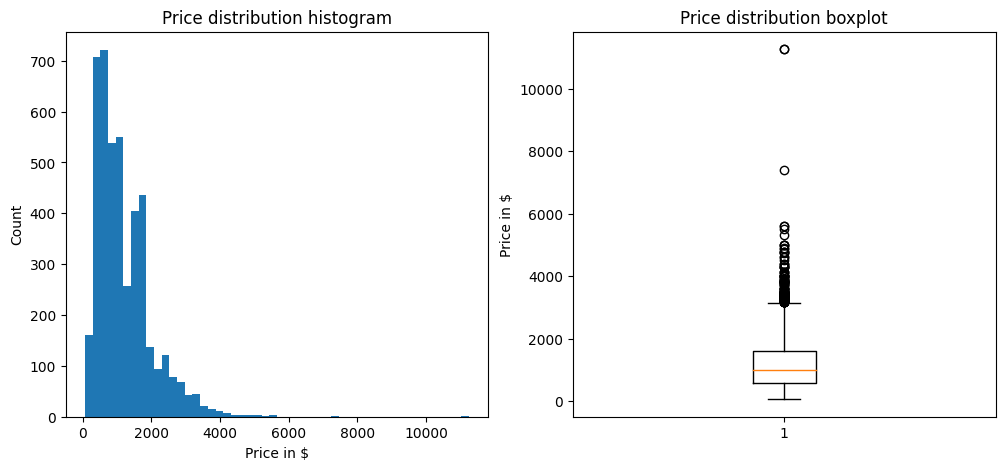

In [337]:
# Plotting price distribution

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(prices['price'], bins=50)
ax[0].set_title('Price distribution histogram')
ax[0].set_xlabel('Price in $')
ax[0].set_ylabel('Count')

ax[1].boxplot(prices['price'])
ax[1].set_title('Price distribution boxplot')
ax[1].set_xlabel('')
ax[1].set_ylabel('Price in $')

fig.show()

In [339]:
# Final data assessment after preprocessing

prices.isna().any()

brand          False
screen_size    False
cpu            False
ram            False
OS             False
graphics       False
price          False
dtype: bool

In [ ]:
for col in prices.columns:
  print(prices[col].value_counts())

# 02 Exporting data

In [344]:
prices = prices.to_csv('/content/laptop_prices.csv', index=False)